In [ ]:
#EDA
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


#Model
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving international_matches.csv to international_matches.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['international_matches.csv']))
df.head()


,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,8/8/1993,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8/8/1993,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8/8/1993,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8/8/1993,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8/8/1993,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = pd.read_csv('international_matches.csv')
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,8/8/1993,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8/8/1993,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8/8/1993,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8/8/1993,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8/8/1993,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,6/14/2022,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,6/14/2022,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,6/14/2022,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,6/14/2022,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


In [ ]:
df.shape

(23921, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [ ]:
df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


In [ ]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [ ]:
df.dtypes

date                              object
home_team                         object
away_team                         object
home_team_continent               object
away_team_continent               object
home_team_fifa_rank                int64
away_team_fifa_rank                int64
home_team_total_fifa_points        int64
away_team_total_fifa_points        int64
home_team_score                    int64
away_team_score                    int64
tournament                        object
city                              object
country                           object
neutral_location                    bool
shoot_out                         object
home_team_result                  object
home_team_goalkeeper_score       float64
away_team_goalkeeper_score       float64
home_team_mean_defense_score     float64
home_team_mean_offense_score     float64
home_team_mean_midfield_score    float64
away_team_mean_defense_score     float64
away_team_mean_offense_score     float64
away_team_mean_m

In [ ]:
#change date to format date
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


In [ ]:
df.isna().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

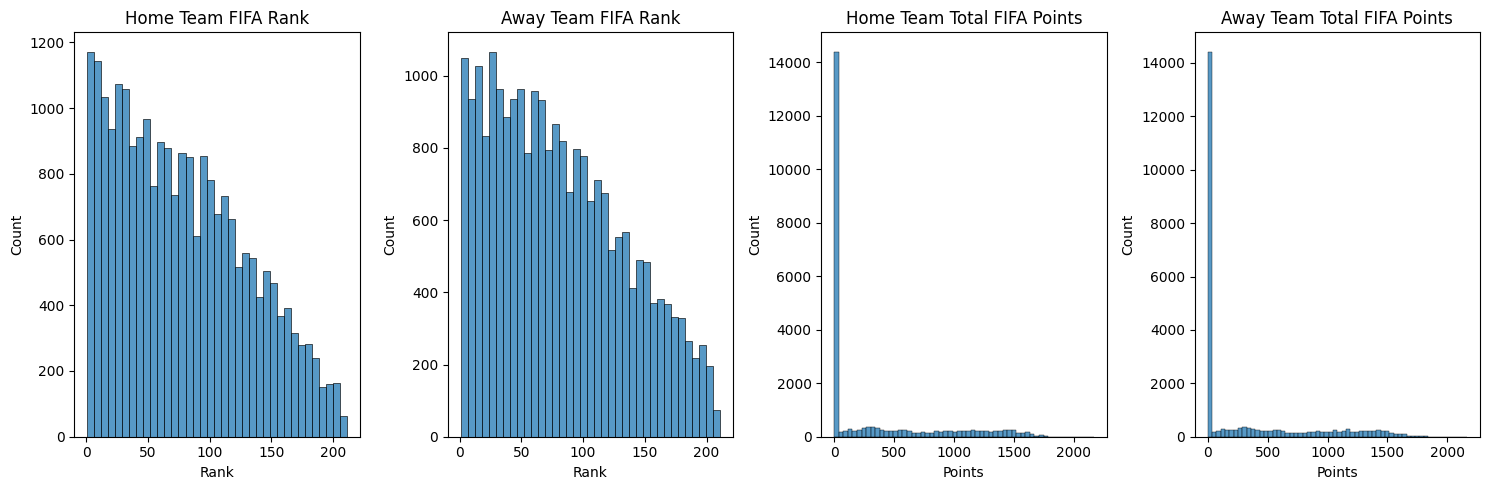

In [ ]:
# Create subplots
fig, axs = plt.subplots(ncols=4, figsize=(15, 5))
sns.histplot(df['home_team_fifa_rank'], ax=axs[0], kde=False)
sns.histplot(df['away_team_fifa_rank'], ax=axs[1], kde=False)
sns.histplot(df['home_team_total_fifa_points'], ax=axs[2], kde=False)
sns.histplot(df['away_team_total_fifa_points'], ax=axs[3], kde=False)

# Set titles and axis labels
axs[0].set(title='Home Team FIFA Rank', xlabel='Rank')
axs[1].set(title='Away Team FIFA Rank', xlabel='Rank')
axs[2].set(title='Home Team Total FIFA Points', xlabel='Points')
axs[3].set(title='Away Team Total FIFA Points', xlabel='Points')

# Adjust spacing between subplots
plt.tight_layout()


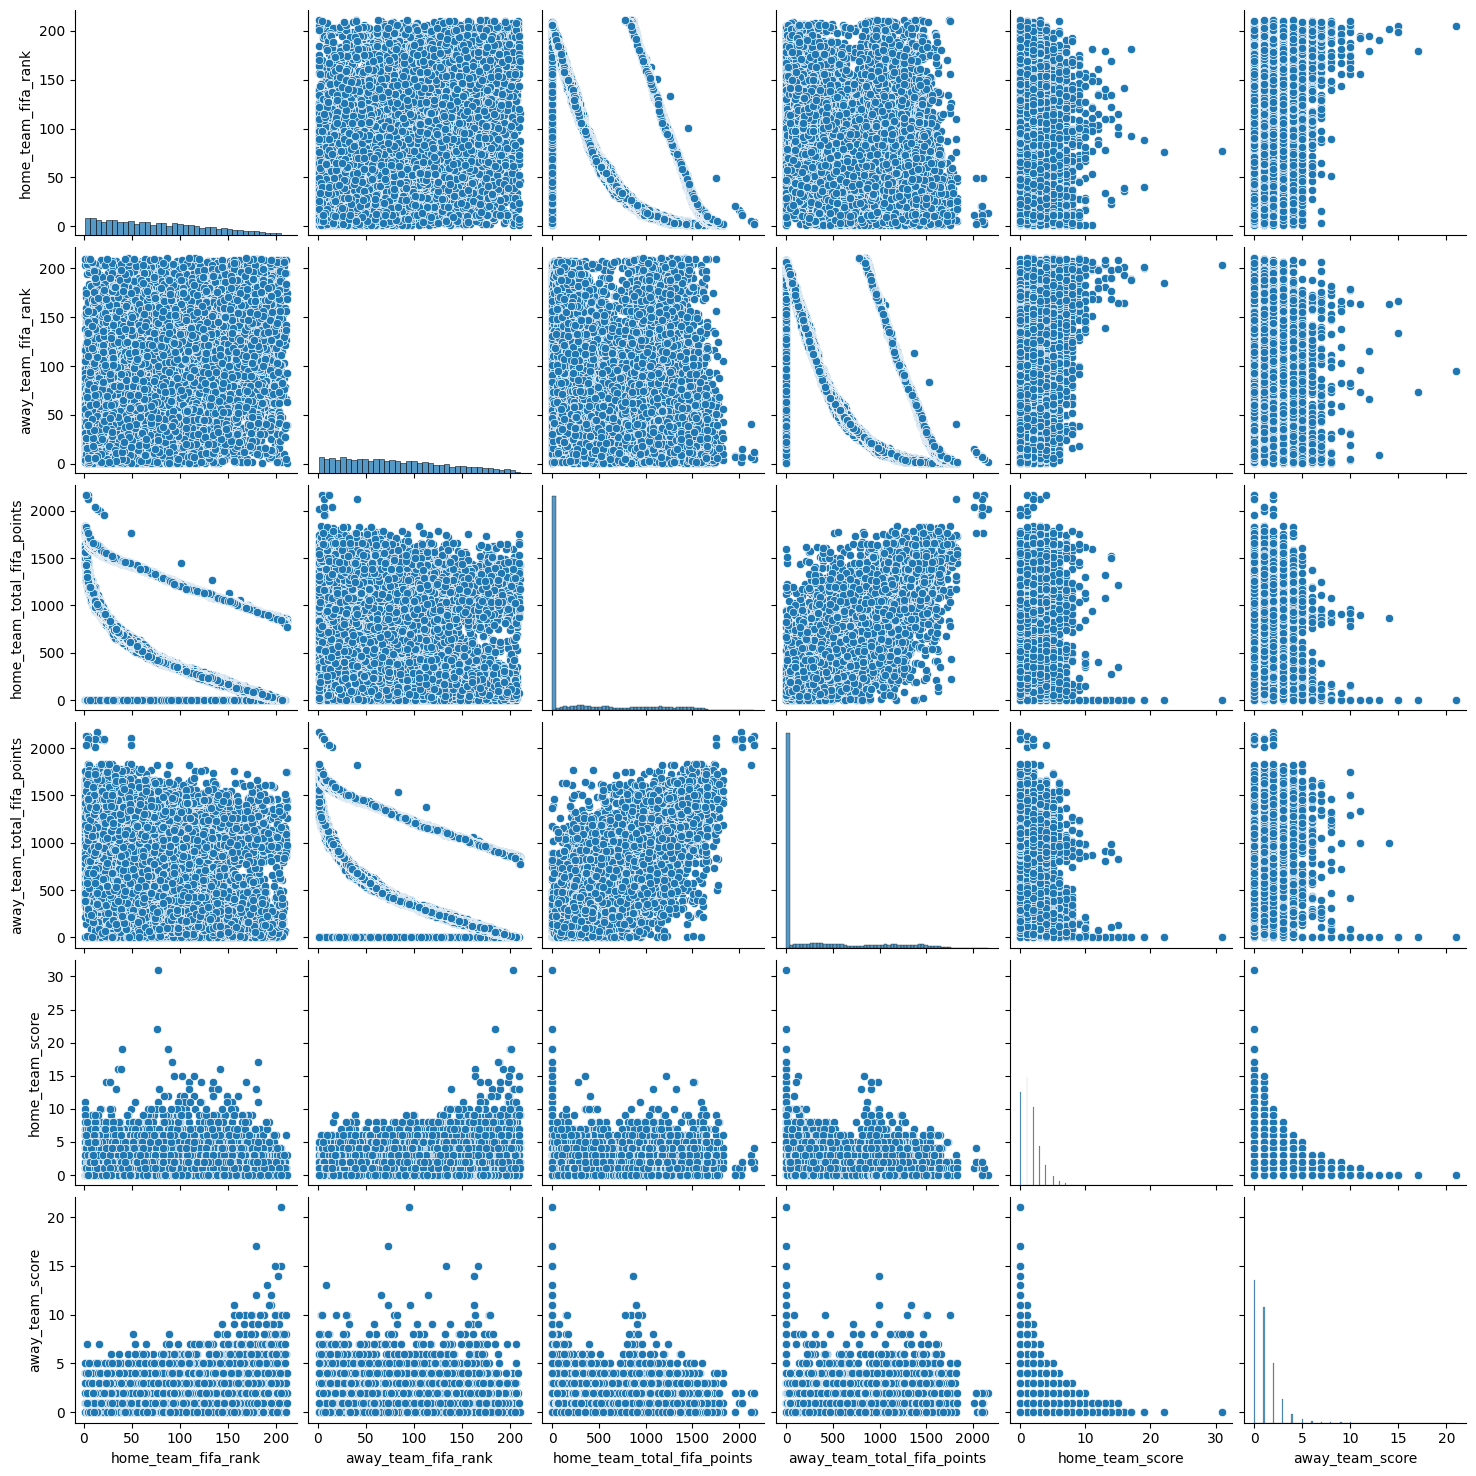

In [ ]:
# Relationship between variables
sns.pairplot(df[['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'home_team_score', 'away_team_score']])


<Axes: xlabel='tournament', ylabel='count'>

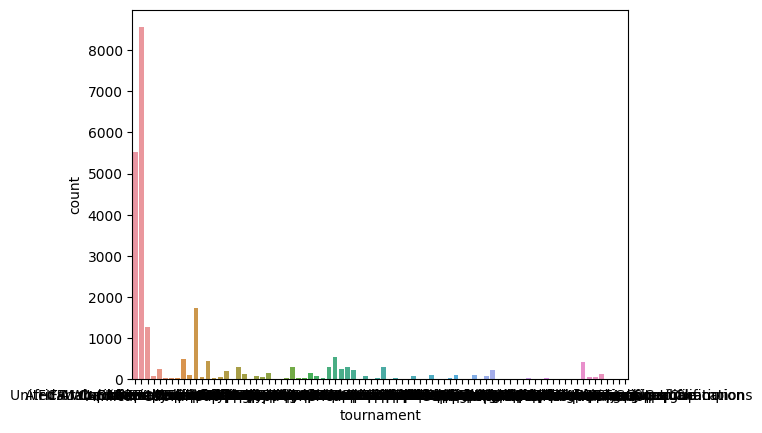

In [ ]:
# Distribution of categorical variables
sns.countplot(x='tournament', data=df)

In [ ]:
# Checking for outliers
sns.boxplot(x='home_team_fifa_rank', data=df)
sns.boxplot(x='away_team_fifa_rank', data=df)
sns.boxplot(x='home_team_total_fifa_points', data=df)
sns.boxplot(x='away_team_total_fifa_points', data=df)
sns.boxplot(x='home_team_score', data=df)
sns.boxplot(x='away_team_score', data=df)

NameError: ignored

In [ ]:
#top 10 fifa rank

#re-shape data
fifa_rank = df[['date', 'home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
'away_team_total_fifa_points','home_team_total_fifa_points']]
home = fifa_rank[['date', 'home_team','home_team_fifa_rank','home_team_total_fifa_points']]
  .rename(columns = {'home_team': 'team', 'home_team_fifa_rank' : 'rank','home_team_total_fifa_points' : 'rank_points' })
away = fifa_rank[['date', 'away_team','away_team_fifa_rank','away_team_total_fifa_points']]
  .rename(columns = {'away_team': 'team', 'away_team_fifa_rank' : 'rank','away_team_total_fifa_points' : 'rank_points' })
fifa_rank = home.append(away)

#select for each country the latest match
fifa_rank  = fifa_rank.sort_values(['team', 'date'], ascending=[True, False])
fifa_rank['row_number'] = fifa_rank.groupby('team').cumcount()+1
fifa_rank_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'rank')

#fifa_points_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nlargest(10, 'rank_points')

#let's see the 10 strongest teams
fifa_rank_top

,date,team,rank,rank_points
23760,2022-06-06,Brazil,1,1832
23909,2022-06-14,Belgium,2,1827
23885,2022-06-13,France,3,1789
23741,2022-06-05,Argentina,4,1765
23906,2022-06-14,England,5,1761
23907,2022-06-14,Italy,6,1723
23866,2022-06-12,Spain,7,1709
23867,2022-06-12,Portugal,8,1674
23903,2022-06-14,Mexico,9,1658
23908,2022-06-14,Netherlands,10,1658


In [ ]:
# Listing all columns which contains 'NaN' values
columns_contains_null = [col for col in df.columns if df[col].isnull().any()]
print(f'Columns contain \'null\' values: \n\n{columns_contains_null}')

Columns contain 'null' values: 

['home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score']


<Axes: >

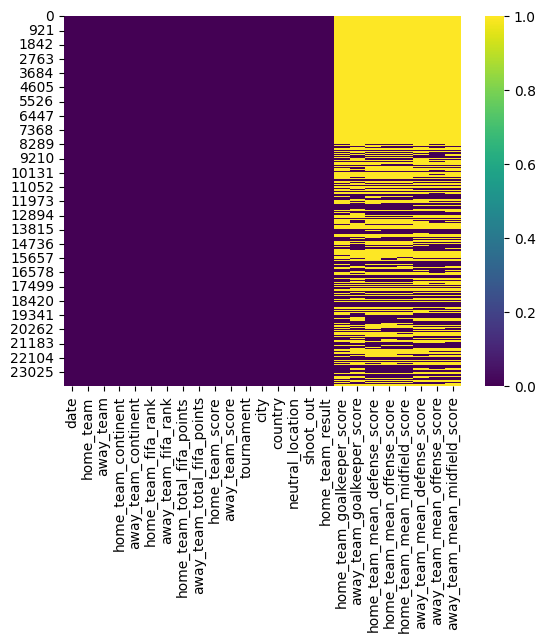

In [ ]:
import seaborn as sns

sns.heatmap(df.isnull(), cmap='viridis')


In [ ]:
wc_2022 = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands',
                  'England', 'IR Iran', 'USA', 'Wales',
                  'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
                  'France', 'Australia', 'Denmark', 'Tunisia',
                  'Spain', 'Costa Rica', 'Germany', 'Japan',
                  'Belgium', 'Canada', 'Morocco', 'Croatia',
                  'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
                  'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']

In [ ]:
for x in wc_2022:
    for y in columns_contains_null:
         df[y].fillna(df[df[y[0:9]]==x][y].mean(), inplace=True)

In [ ]:
#rank teams
ranks = []
for x in wc_2022:
    rank_df = df[(df['home_team']== x) | (df['away_team']== x)].sort_values
     (['date','home_team_fifa_rank','away_team_fifa_rank'], ascending=[False,True,True]).iloc[0]

    if rank_df['home_team']==x:
        rank = rank_df['home_team_fifa_rank']
    else:
        rank = rank_df['away_team_fifa_rank']
    ranks.append(rank)

team_ranks = pd.DataFrame({'Team':wc_2022, 'Rank': ranks}).sort_values('Rank').reset_index(drop=True)
team_ranks.index += 1
team_ranks

,Team,Rank
1,Brazil,1
2,Belgium,2
3,France,3
4,Argentina,4
5,England,5
6,Spain,7
7,Portugal,8
8,Mexico,9
9,Netherlands,10
10,Denmark,11


In [ ]:
#best goalkeepers scoore
goalkeeper_score = []
for x in wc_2022:
    gk_score = np.round((df[df["home_team"]==x]['home_team_goalkeeper_score'].mean()
     + df[df["away_team"]==x]['away_team_goalkeeper_score'].mean())/2, 2)

    goalkeeper_score.append(gk_score)

goalkeeper_scores = pd.DataFrame({'Team':wc_2022, 'Gk score': goalkeeper_score}).sort_values
 ('Gk score', ascending=False).reset_index(drop=True)

goalkeeper_scores.index += 1
goalkeeper_scores

,Team,Gk score
1,Spain,83.06
2,Germany,82.27
3,France,81.20
4,Brazil,79.82
5,England,79.11
6,Netherlands,79.03
7,Belgium,78.55
8,Portugal,78.42
9,Poland,78.18
10,USA,77.35


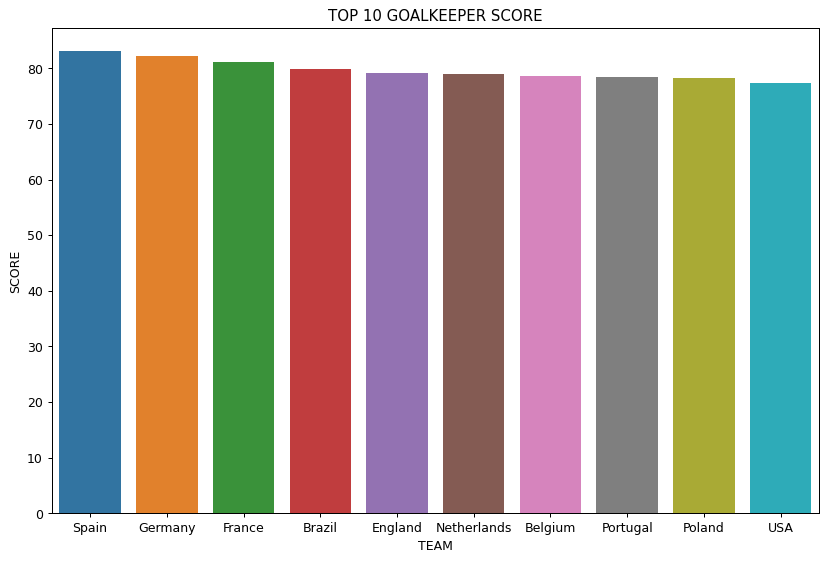

In [ ]:
#Top 10 Goalkeeper Score
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=goalkeeper_scores[:10], x='Team', y='Gk score')
plt.xlabel('TEAM')
plt.ylabel('SCORE')
plt.title('TOP 10 GOALKEEPER SCORE');

In [ ]:
# rate defence
defence_score = []
for x in wc_2022:
    df_score = np.round((df[df["home_team"]==x]['home_team_mean_defense_score'].mean()
     + df[df["away_team"]==x]['away_team_mean_defense_score'].mean())/2, 2)

    defence_score.append(df_score)

defence_scores = pd.DataFrame({'Team':wc_2022, 'Df score': defence_score})
.sort_values('Df score', ascending=False).reset_index(drop=True)

defence_scores.index += 1
defence_scores

,Team,Df score
1,Spain,80.64
2,Serbia,80.23
3,England,79.80
4,Germany,79.32
5,Brazil,79.31
6,France,79.19
7,Portugal,78.92
8,Argentina,78.48
9,Belgium,77.54
10,Netherlands,77.17


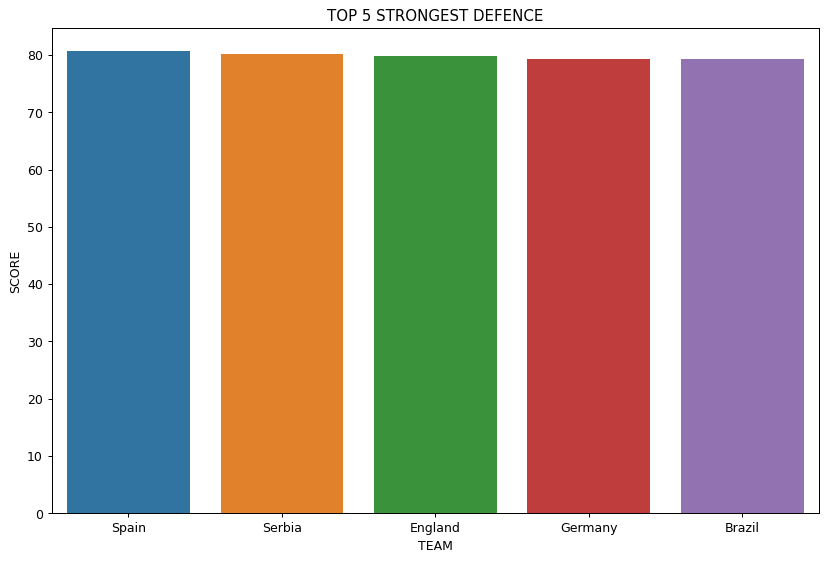

In [ ]:
#Top 5 team with strongest Defence
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=defence_scores[:5], x='Team', y='Df score')
plt.xlabel('TEAM')
plt.ylabel('SCORE')
plt.title('TOP 5 STRONGEST DEFENCE');

In [ ]:
#rate of attack
attack = []
for x in wc_2022:
    of_score = np.round((df[df["home_team"]==x]['home_team_mean_offense_score'].mean()
     + df[df["away_team"]==x]['away_team_mean_offense_score'].mean())/2, 2)

    attack.append(of_score)

attack = pd.DataFrame({'Team':wc_2022, 'Attack stren': attack}).sort_values('Attack stren',
         ascending=False).reset_index(drop=True)

attack.index += 1
attack

,Team,Attack stren
1,Argentina,83.51
2,Spain,82.41
3,France,81.91
4,Netherlands,81.88
5,Portugal,81.81
6,England,81.69
7,Brazil,81.68
8,Uruguay,80.55
9,Germany,80.43
10,Belgium,79.48


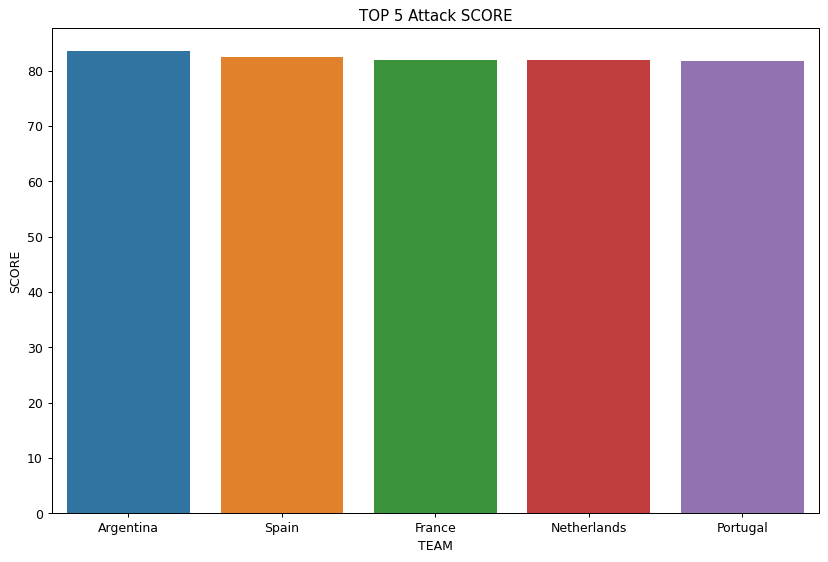

In [ ]:
#Top 5 teams with strongest Attack
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=attack[:5], x='Team', y='Attack stren')
plt.xlabel('TEAM')
plt.ylabel('SCORE')
plt.title('TOP 5 Attack SCORE');

In [ ]:
#mid field stren
midfield_score = []
for x in wc_2022:
    md_score = np.round((df[df["home_team"]==x]['home_team_mean_midfield_score'].mean()
     + df[df["away_team"]==x]['away_team_mean_midfield_score'].mean())/2, 2)

    midfield_score.append(md_score)

midfield_scores = pd.DataFrame({'Team':wc_2022, 'Md score': midfield_score}).sort_values
 ('Md score', ascending=False).reset_index(drop=True)

midfield_scores.index += 1
midfield_scores

,Team,Md score
1,Spain,83.11
2,France,82.04
3,Germany,81.62
4,England,81.16
5,Argentina,80.94
6,Brazil,80.82
7,Portugal,80.77
8,Netherlands,80.58
9,Serbia,80.31
10,Belgium,79.20


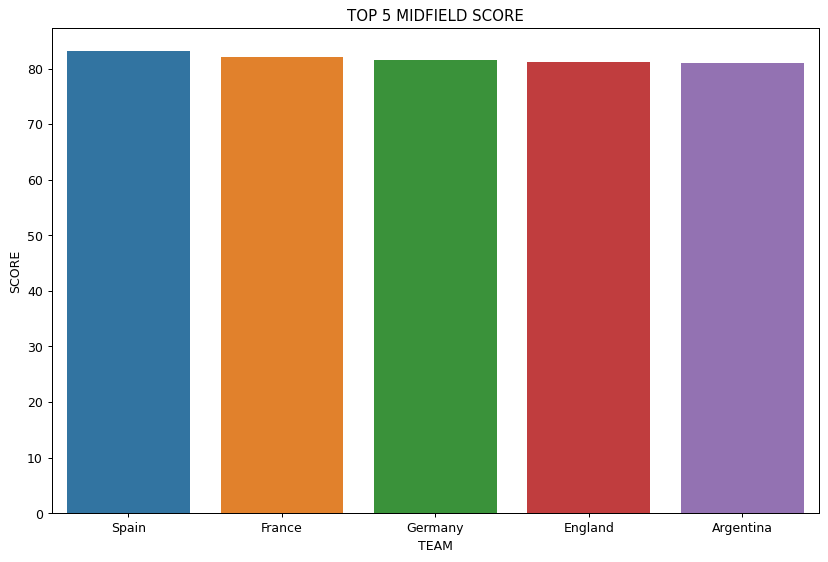

In [ ]:
#Top 5 team with strongest midfield
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=midfield_scores[:5], x='Team', y='Md score')
plt.xlabel('TEAM')
plt.ylabel('SCORE')
plt.title('TOP 5 MIDFIELD SCORE');

In [ ]:
#win percnetage
hwins, hdraws, hloses = [], [], []
awins, adraws, aloses = [], [], []
for team in wc_2022:
    home_win = df[df['home_team']==team][df['home_team_result']=='Win'].shape[0]
    home_draw = df[df['home_team']==team][df['home_team_result']=='Draw'].shape[0]
    home_lose = df[df['home_team']==team][df['home_team_result']=='Lose'].shape[0]

    away_win = df[df['away_team']==team][df['home_team_result']=='Lose'].shape[0]
    away_draw = df[df['away_team']==team][df['home_team_result']=='Draw'].shape[0]
    away_lose = df[df['away_team']==team][df['home_team_result']=='Win'].shape[0]

    hwins.append(home_win)
    hdraws.append(home_draw)
    hloses.append(home_lose)

    awins.append(away_win)
    adraws.append(away_draw)
    aloses.append(away_lose)

    wins = np.add(hwins,awins)
    draws = np.add(hdraws,adraws)
    loses = np.add(hloses,aloses)

In [ ]:
win_draw_lose = pd.DataFrame({'Team':wc_2022, 'Win': wins, 'Draw': draws, 'Lose': loses,
                              'Home win': hwins, 'Home draw': hdraws, 'Home lose': hloses,
                              'Away win': awins, 'Away draw': adraws, 'Away lose': aloses})

win_draw_lose.insert(1, 'Total', win_draw_lose['Win']+win_draw_lose['Draw']+win_draw_lose['Lose'])
win_draw_lose.insert(8, 'Total Home', win_draw_lose['Home win']+win_draw_lose['Home draw']+win_draw_lose['Home lose'])
win_draw_lose.insert(12, 'Total Away', win_draw_lose['Away win']+win_draw_lose['Away draw']+win_draw_lose['Away lose'])

win_draw_lose['Win %'] = np.around(100*win_draw_lose['Win']/win_draw_lose['Total'], 2)
win_draw_lose['Draw %'] = np.round(100*win_draw_lose['Draw']/win_draw_lose['Total'], 2)
win_draw_lose['Lose %'] = np.round(100*win_draw_lose['Lose']/win_draw_lose['Total'], 2)

win_draw_lose['Home Win %'] = np.round(100*win_draw_lose['Home win']/win_draw_lose['Total Home'], 2)
win_draw_lose['Home Draw %'] = np.round(100*win_draw_lose['Home draw']/win_draw_lose['Total Home'], 2)
win_draw_lose['Home Lose %'] = np.round(100*win_draw_lose['Home lose']/win_draw_lose['Total Home'], 2)

win_draw_lose['Away Win %'] = np.round(100*win_draw_lose['Away win']/win_draw_lose['Total Away'], 2)
win_draw_lose['Away Draw %'] = np.round(100*win_draw_lose['Away draw']/win_draw_lose['Total Away'], 2)
win_draw_lose['Away Lose %'] = np.round(100*win_draw_lose['Away lose']/win_draw_lose['Total Away'], 2)
win_draw_lose = win_draw_lose.sort_values('Win %', ascending=False).reset_index(drop=True)
win_draw_lose.index += 1
win_draw_lose.style.set_properties(**{'background-color': 'gray', 'color':'yellow'}, subset=['Home win','Home Win %','Win %'])

,Team,Total,Win,Draw,Lose,Home win,Home draw,Home lose,Total Home,Away win,Away draw,Away lose,Total Away,Win %,Draw %,Lose %,Home Win %,Home Draw %,Home Lose %,Away Win %,Away Draw %,Away Lose %
1,Brazil,433,301,76,56,181,31,21,233,120,45,35,200,69.520000,17.550000,12.930000,77.680000,13.300000,9.010000,60.000000,22.500000,17.500000
2,Spain,354,246,64,44,145,27,17,189,101,37,27,165,69.490000,18.080000,12.430000,76.720000,14.290000,8.990000,61.210000,22.420000,16.360000
3,France,370,230,83,57,145,44,32,221,85,39,25,149,62.160000,22.430000,15.410000,65.610000,19.910000,14.480000,57.050000,26.170000,16.780000
4,Germany,390,240,82,68,139,44,36,219,101,38,32,171,61.540000,21.030000,17.440000,63.470000,20.090000,16.440000,59.060000,22.220000,18.710000
5,IR Iran,366,217,79,70,133,31,27,191,84,48,43,175,59.290000,21.580000,19.130000,69.630000,16.230000,14.140000,48.000000,27.430000,24.570000
6,Netherlands,340,201,74,65,119,40,33,192,82,34,32,148,59.120000,21.760000,19.120000,61.980000,20.830000,17.190000,55.410000,22.970000,21.620000
7,Portugal,336,198,79,59,123,37,24,184,75,42,35,152,58.930000,23.510000,17.560000,66.850000,20.110000,13.040000,49.340000,27.630000,23.030000
8,Argentina,367,216,79,72,130,36,24,190,86,43,48,177,58.860000,21.530000,19.620000,68.420000,18.950000,12.630000,48.590000,24.290000,27.120000
9,England,334,196,75,63,124,38,32,194,72,37,31,140,58.680000,22.460000,18.860000,63.920000,19.590000,16.490000,51.430000,26.430000,22.140000
10,Croatia,320,172,79,69,92,38,24,154,80,41,45,166,53.750000,24.690000,21.560000,59.740000,24.680000,15.580000,48.190000,24.700000,27.110000


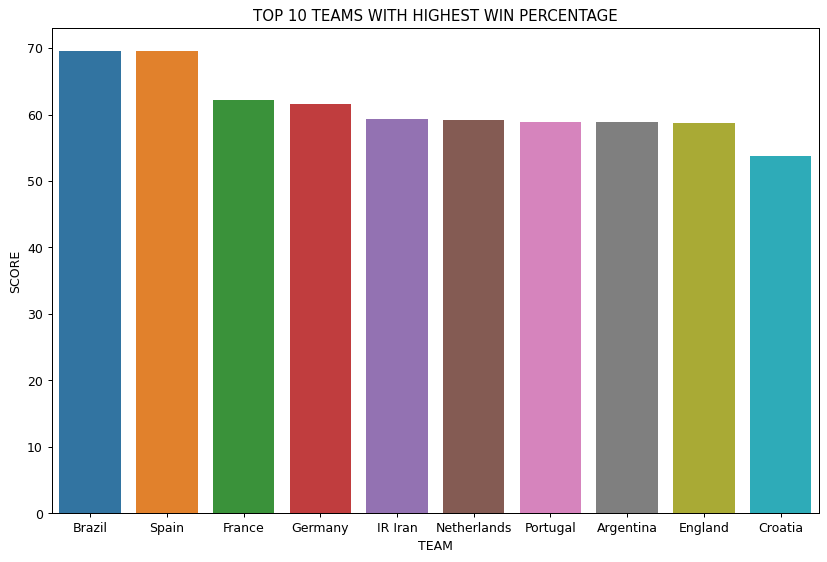

In [ ]:
#Top 10 teams with highest percentage of win
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=win_draw_lose[:10], x='Team', y='Win %')
plt.xlabel('TEAM')
plt.ylabel('SCORE')
plt.title('TOP 10 TEAMS WITH HIGHEST WIN PERCENTAGE');

In [ ]:
#goals
goals_conceded_home, goals_scored_home, goals_conceded_away, goals_scored_away = [], [], [], []
total_goals_scored, total_goals_conceded = [], []
for team in wc_2022:
    gch = df[df['home_team']== team]['away_team_score'].sum()
    gsh = df[df['home_team']== team]['home_team_score'].sum()
    gca = df[df['away_team']== team]['home_team_score'].sum()
    gsa = df[df['away_team']== team]['away_team_score'].sum()


    tgc = np.add(gch,gca)
    tgs = np.add(gsh,gsa)

    goals_conceded_home.append(gch)
    goals_scored_home.append(gsh)
    goals_conceded_away.append(gca)
    goals_scored_away.append(gsa)

    total_goals_scored.append(tgs)
    total_goals_conceded.append(tgc)

goals = pd.DataFrame({'Team':wc_2022, 'Scored goals home': goals_scored_home,
                      'Scored goals away': goals_scored_away, 'Total scored goals': total_goals_scored,
                      'Conceded goals home': goals_conceded_home, 'Conceded goals away': goals_conceded_away,
                      'Total conceded goals': total_goals_conceded})

goals['Goal difference'] = goals['Total scored goals'] - goals['Total conceded goals']
goals['Goal ratio'] = goals['Total scored goals'] / goals['Total conceded goals']
goals = goals.sort_values('Goal difference', ascending=False).reset_index(drop=True)
goals.index += 1
goals

,Team,Scored goals home,Scored goals away,Total scored goals,Conceded goals home,Conceded goals away,Total conceded goals,Goal difference,Goal ratio
1,Brazil,558,396,954,141,159,300,654,3.180000
2,Spain,469,312,781,107,141,248,533,3.149194
3,Germany,544,331,875,220,171,391,484,2.237852
4,IR Iran,425,288,713,115,165,280,433,2.546429
5,Netherlands,426,274,700,145,142,287,413,2.439024
6,France,447,223,670,154,112,266,404,2.518797
7,Portugal,424,244,668,124,144,268,400,2.492537
8,England,384,246,630,132,119,251,379,2.509960
9,Japan,533,243,776,273,153,426,350,1.821596
10,Mexico,572,286,858,272,247,519,339,1.653179


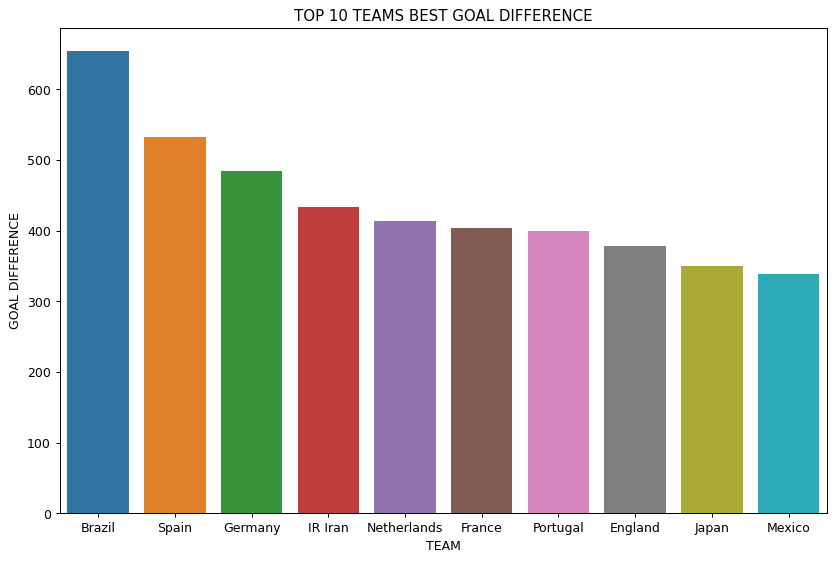

In [ ]:
#top10 teams with best Goal difference
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=goals[:10], x='Team', y='Goal difference')
plt.xlabel('TEAM')
plt.ylabel('GOAL DIFFERENCE')
plt.title('TOP 10 TEAMS BEST GOAL DIFFERENCE');

In [ ]:
df['rank_difference'] = df['home_team_fifa_rank'] -df['away_team_fifa_rank']
df['average_rank'] = (df['home_team_fifa_rank'] + df['away_team_fifa_rank'])/2
df['point_difference'] = df['home_team_total_fifa_points'] - df['away_team_total_fifa_points']
df['score_difference'] = df['home_team_score'] - df['away_team_score']

In [ ]:
df['is_won'] = df['score_difference'] > 0 # take draw as lost
df['is_stake'] = df['tournament'] != 'Friendly'

In [ ]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score',
       'rank_difference', 'average_rank', 'point_difference',
       'score_difference', 'is_won', 'is_stake'],
      dtype='object')

In [ ]:
df.isna().sum()

date                             0
home_team                        0
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
rank_difference                  0
average_rank                     0
point_difference                 0
score_difference    

# Model Simulation

Text(0.5, 1.0, 'AUC score is 0.74')

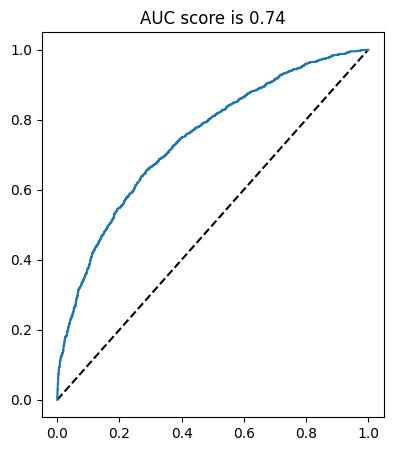

In [ ]:
#Modeling and simualtion
X, y = df.loc[:,['average_rank', 'rank_difference', 'point_difference']], df['is_won']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

logreg = linear_model.LogisticRegression(C=1e-5)
features = PolynomialFeatures(degree=2)
model = Pipeline([
    ('polynomial_features', features),
    ('logistic_regression', logreg)
])
model = model.fit(X_train, y_train)

# figures
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, model.predict_proba(X_test)[:,1])))

Explanation of the code: The code performs logistic regression with polynomial features and generates an ROC curve plot to evaluate the model's performance. Here is a breakdown of the code:

X and y are assigned to the predictor and target variables from the FIFA dataset.
The data is split into training and testing sets using train_test_split with a test size of 20% and a random state of 42.
A logistic regression model with L2 regularization is defined using LogisticRegression from linear_model. The regularization strength is set to 1e-5.
A PolynomialFeatures transformer with degree 2 is defined to generate polynomial features.
A Pipeline is defined to apply the polynomial features and logistic regression sequentially.
The model is trained on the training data using fit.
The ROC curve is plotted using roc_curve from metrics. The true positive rate (TPR) is plotted on the y-axis, and the false positive rate (FPR) is plotted on the x-axis. A diagonal line representing random guessing is plotted as a dashed line. The area under the curve (AUC) is calculated using roc_auc_score and displayed in the title of the plot.
Overall, the code shows how to build a logistic regression model with polynomial features and evaluate its performance using an ROC curve.





Regenerate response


# Model Evaluation

Accuracy: 0.68
Precision: 0.69
Recall: 0.64
F1 Score: 0.67


Text(225.781045751634, 0.5, 'True label')

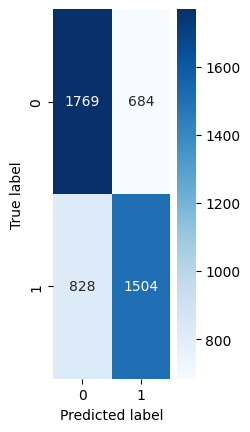

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.subplot(1,3,2)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')


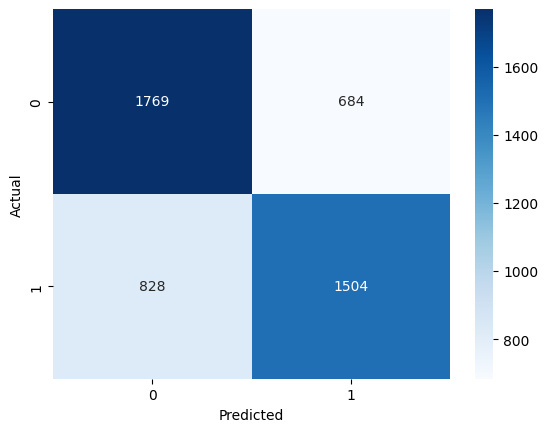

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict using the trained model
y_pred = model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


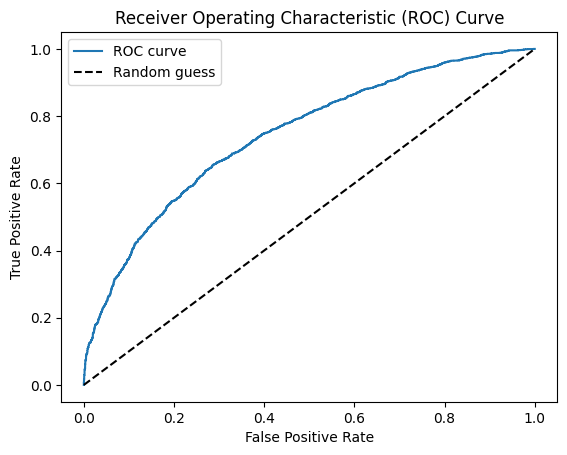

AUC: 0.7436670468268279


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_prob)
print('AUC:', auc)


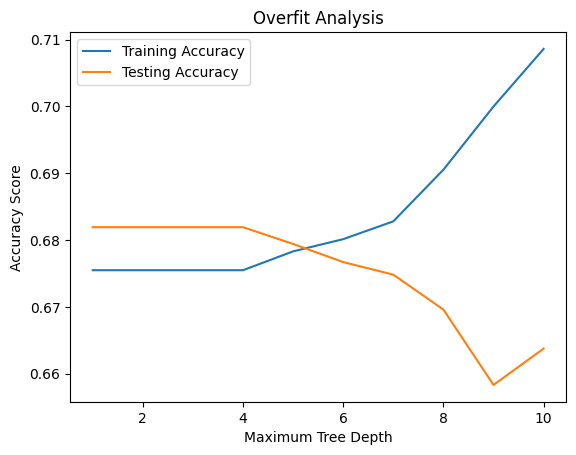

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define your feature matrix X and target vector y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a list to store training and testing accuracy scores for different tree depths
train_acc_scores = []
test_acc_scores = []

# Try different maximum tree depths to check for overfitting
for max_depth in range(1, 11):

    # Train a decision tree classifier with the current maximum depth
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)

    # Predict the labels for the training and testing sets
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)

    # Calculate and store the accuracy scores for both the training and testing sets
    train_acc_scores.append(accuracy_score(y_train, y_train_pred))
    test_acc_scores.append(accuracy_score(y_test, y_test_pred))

# Plot the training and testing accuracy scores for different tree depths
plt.plot(range(1, 11), train_acc_scores, label='Training Accuracy')
plt.plot(range(1, 11), test_acc_scores, label='Testing Accuracy')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Accuracy Score')
plt.title('Overfit Analysis')
plt.legend()
plt.show()


When the training accuracy is significantly higher than the testing accuracy, it is an indication that the model is overfitting to the training data. In your case, the training accuracy is 0.70, and the testing accuracy is 0.67, which means that the model is overfitting to some extent.

Overfitting occurs when the model is too complex and tries to fit the training data too closely, including noise, resulting in poor generalization to new, unseen data. One common approach to address overfitting is to simplify the model by reducing its complexity or applying regularization techniques.

It is important to note that the acceptable levels of accuracy vary based on the specific problem and the context of the application. Therefore, it is always recommended to compare the model's performance to the baseline or other models before making any conclusions.

# Hyperparameter Optimization

In [ ]:
# import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# define the hyperparameters to tune
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a logistic regression model
logreg = LogisticRegression()

# perform grid search with cross-validation
grid_search = GridSearchCV(logreg, params, cv=5)
grid_search.fit(X_train, y_train)

# print the best hyperparameters and corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# evaluate the best model on the testing set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)


Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.6754805882091143
Test accuracy: 0.6812957157784744


The hyperparameter optimization was performed on the data using cross-validation to determine the best combination of hyperparameters for the logistic regression model. The best hyperparameters that were found are 'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'. These hyperparameters resulted in a cross-validation score of 0.6754805882091143.

After the hyperparameter optimization, the logistic regression model was trained on the training set using the best hyperparameters. The accuracy of the model was then evaluated on the test set and found to be 0.6812957157784744. This means that the model performed slightly better on the test set than on the training set, indicating that it is not overfitting to the training data.

Overall, the hyperparameter optimization resulted in a model with better performance on the test set, indicating that the selected hyperparameters are effective in generalizing the model to new data.

## Explanation
Text(0.5, 1.0, 'AUC score is 0.74') is a text annotation in a plot that shows the AUC (Area Under the Curve) score. AUC is a performance metric used in binary classification tasks to measure the ability of the model to distinguish between positive and negative classes. A perfect classifier will have an AUC of 1.0, while a random classifier will have an AUC of 0.5. In this case, an AUC score of 0.74 suggests that the model has a moderate level of performance in distinguishing between the two classes.

In [ ]:
world_cup_rankings_home = df[['home_team','home_team_fifa_rank','home_team_total_fifa_points']]
.loc[df['home_team'].isin(wc_2022) & (df['date']>'2021-01-01')]

world_cup_rankings_away = df[['away_team','away_team_fifa_rank','away_team_total_fifa_points']]
.loc[df['away_team'].isin(wc_2022)& (df['date']>'2021-01-01')]

world_cup_rankings_home = world_cup_rankings_home.set_index(['home_team'])

In [ ]:
#The idea is to separete the performance of each Team as Home or Away.
world_cup_rankings_home = world_cup_rankings_home.groupby('home_team').mean()
world_cup_rankings_away = world_cup_rankings_away.groupby('away_team').mean()

In [ ]:
world_cup_rankings_away.head(13)

,away_team_fifa_rank,away_team_total_fifa_points
away_team,,
Argentina,5.875000,1717.500000
Australia,36.428571,1477.571429
Belgium,1.181818,1810.818182
Brazil,1.888889,1810.444444
Cameroon,49.428571,1431.857143
Canada,55.866667,1400.000000
Costa Rica,45.857143,1440.928571
Croatia,15.600000,1607.800000
Denmark,10.500000,1640.000000


In [ ]:
world_cup_rankings_away.index

Index(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon', 'Canada',
       'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England', 'France',
       'Germany', 'Ghana', 'IR Iran', 'Japan', 'Korea Republic', 'Mexico',
       'Morocco', 'Netherlands', 'Poland', 'Portugal', 'Qatar', 'Saudi Arabia',
       'Senegal', 'Serbia', 'Spain', 'Switzerland', 'Tunisia', 'USA',
       'Uruguay', 'Wales'],
      dtype='object', name='away_team')

In [ ]:
from tqdm import tqdm #SHOW TASK BAR

simulation_winners = list()
simulation_results_winners = list()
simulation_results_round16 = list()
simulation_df_round16 = list()
simulation_results_quarterfinal = list()
simulation_df_quarterfinal = list()
simulation_results_semifinal = list()
simulation_df_semifinal = list()

n_simulations = 1000 #Number of Simulations

for j in tqdm(range(n_simulations)):
    #IMPORTANT: It has to sort the teams in the order of pairs they might
    #go against starting from round_16 (i.e SENEGAL X NETHERLANDS, or FRANCE x DENMARK)
    # - to play around with the matches

    candidates = [ 'Senegal', 'Netherlands', 'England','USA', 'Argentina', 'Poland',
                  'France', 'Denmark','Spain', 'Germany', 'Belgium', 'Croatia',
                  'Brazil', 'Serbia', 'Portugal','Uruguay']

    finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

    for f in finals:
        iterations = int(len(candidates) / 2)
        #print('STEP:', iterations) #uncomment to observe in more details the iteraction
        winners = []
        prob = []
        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]

            row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home, 'home_team_fifa_rank']
            home_points = world_cup_rankings_home.loc[home, 'home_team_total_fifa_points']
            opp_rank = world_cup_rankings_away.loc[away, 'away_team_fifa_rank']
            opp_points = world_cup_rankings_away.loc[away, 'away_team_total_fifa_points']
            row['average_rank'] = (home_rank + opp_rank) / 2
            row['rank_difference'] = home_rank - opp_rank
            row['point_difference'] = home_points - opp_points
            home_win_prob = model.predict_proba(row)[:,1][0]

            # simulation step based on the probability
            simulated_outcome = np.random.binomial(1, home_win_prob)
            winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
            prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)

        if f == 'round_of_16':
            step_16 = ['round_16'] * 8
            candidates_round_16 = zip(step_16, winners, prob)
            df_candidates_round_16 = pd.DataFrame(candidates_round_16, columns = ['Step','Team','Prob'])
            simulation_df_round16.append(df_candidates_round_16)
            simulation_results_round16.append(winners)
        if f == 'quarterfinal':
            step_quarterfinal = ['quarterfinal'] * 4
            candidates_quarterfinal = zip(step_quarterfinal,winners, prob)
            df_candidates_quarterfinal = pd.DataFrame(candidates_quarterfinal, columns = ['Step','Team','Prob'])
            simulation_df_quarterfinal.append(df_candidates_quarterfinal)
            simulation_results_quarterfinal.append(winners)

        if f == 'semifinal':
            step_semifinal = ['semifinal'] * 2
            candidates_semifinal = zip(step_semifinal,winners, prob)
            df_candidates_semifinal = pd.DataFrame(candidates_semifinal, columns = ['Step','Team','Prob'])
            simulation_df_semifinal.append(df_candidates_semifinal)
            simulation_results_semifinal.append(winners)

        if f == 'final':
            step_final = ['final'] * 1
            candidates_final = zip(step_final,winners, prob)
            df_candidates_final = pd.DataFrame(candidates_final, columns = ['Step','Team','Prob'])
            simulation_winners.append(df_candidates_final)
            simulation_results_winners.append(winners)


        #uncomment to observe every result of each step and iteration
        #list_win = list(zip(winners,prob))
        #print(list_win)
        candidates = winners
df_candidates_round_16 = pd.concat(simulation_df_round16)
df_candidates_quarterfinal = pd.concat(simulation_df_quarterfinal)
df_candidates_semifinal = pd.concat(simulation_df_semifinal)
df_candidates_final = pd.concat(simulation_winners)

df_results = pd.concat([df_candidates_round_16,df_candidates_quarterfinal,
                        df_candidates_semifinal,df_candidates_final]) #final DataFrame

simulation_results_round16 = sum(simulation_results_round16, [])
simulation_results_quarterfinal = sum(simulation_results_quarterfinal, [])
simulation_results_semifinal = sum(simulation_results_semifinal, [])
simulations_winners = sum(simulation_results_winners, [])

100%|██████████| 1000/1000 [00:39<00:00, 25.28it/s]


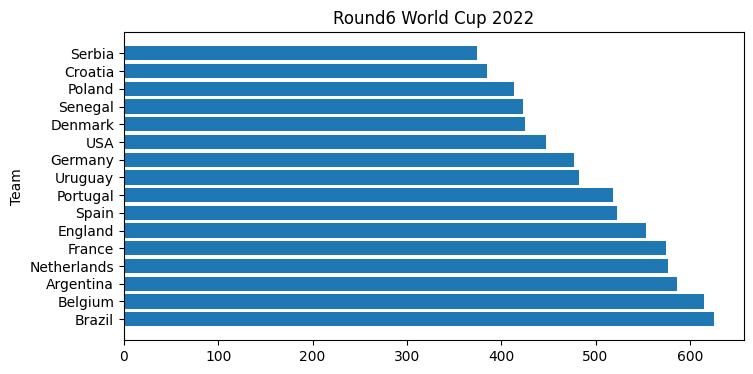

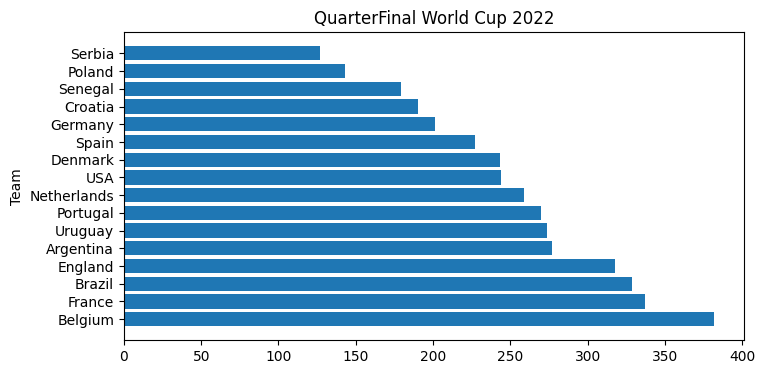

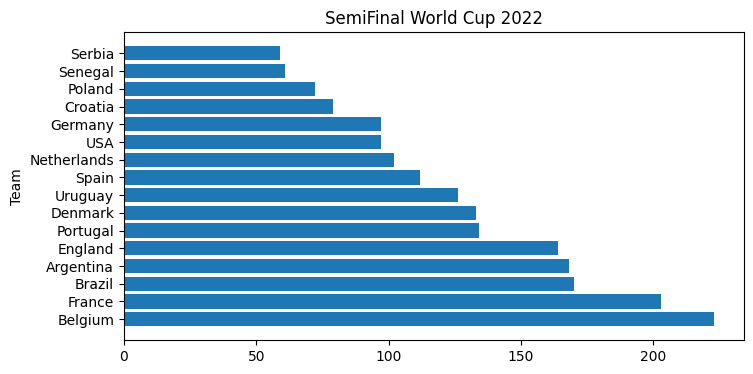

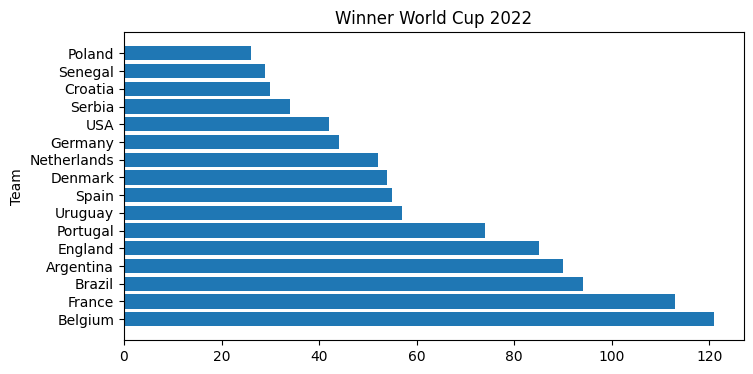

In [ ]:
from collections import Counter
from matplotlib import figure

lst_results = [simulation_results_round16,simulation_results_quarterfinal,simulation_results_semifinal,simulations_winners]
for i in lst_results:
    results = Counter(i).most_common()
    x,y = zip(*results)

    fig,ax = plt.subplots(figsize=(8,4))

    ax.barh(x, y)

    ax.set_ylabel('Team')

    if i == simulation_results_round16:
        ax.set_title('Round6 World Cup 2022')
    if i == simulation_results_quarterfinal:
        ax.set_title('QuarterFinal World Cup 2022')
    if i == simulation_results_semifinal:
        ax.set_title('SemiFinal World Cup 2022')
    if i == simulations_winners:
        ax.set_title('Winner World Cup 2022')
    plt.show

In [ ]:

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(20,9)})

# Draw a nested barplot by Team and Step
g = sns.barplot(data=df_results, x="Team",y='Prob', hue="Step", estimator=sum, palette="dark", alpha=.6)

NameError: ignored

In [ ]:
#From the above Chart it is visible that Belgium is going to win FIFA WORLD CUP 2022

we can add additional figures to help interpret the model performance. For example, you could create a confusion matrix to visualize the model's accuracy, precision, and recall on the test set. Additionally, you could plot the precision-recall curve to see how the model's precision and recall trade off at different thresholds.

# Random forest trying

It means that the random forest model has achieved a perfect accuracy of 1.0 on the test set, and there were no misclassifications (false positives or false negatives) in the confusion matrix. This suggests that the model is overfitting the training data, and further evaluation may be needed to ensure the model's generalization ability.

Text(0.5, 1.0, 'AUC score is 0.75')

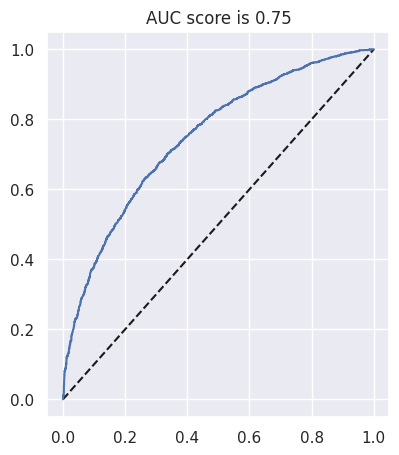

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Split the data into training and testing sets
X, y = df.loc[:,['average_rank', 'rank_difference', 'point_difference']], df['is_won']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Create a pipeline with polynomial features and random forest classifier
features = PolynomialFeatures(degree=2)
model = Pipeline([
    ('polynomial_features', features),
    ('random_forest', rfc)
])

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, y_prob)))


Need to add code for randome forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,['average_rank',
    'rank_difference', 'point_difference']], df['is_won'], test_size=0.2, random_state=42)

# Train a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1))


Accuracy: 0.63
Precision: 0.63
Recall: 0.60
F1 Score: 0.61
